# Exemplos de Implementações Sistólicas

Estes exemplos foram desenvolvidos em 2021 pelos estudantes:
Alexandre Chain, Carlos Sabino, Emanuell Carvalho, Marcelo Nascimento do curso de Ciência da Computação da UFV.

In [ ]:
!pip install git+https://github.com/lesc-ufv/cad4u.git &> /dev/null
!git clone https://github.com/lesc-ufv/cad4u &> /dev/null
%load_ext plugin

## Exemplo 1

O [artigo clássico de Sistólicos](https://github.com/arduinoufv/inf450_peo/blob/master/apostilas/2_1982-kung-why-systolic-architecture.pdf) apresenta várias maneiras de array sistólicos para uma convolução em 1D com a equação $y_i = x_i w_1 + x_{i+1} w_2+ x_{x+2} w_3$.




## Exemplo Multiplicador Matriz Sistólicos

O multiplicador de [matriz semisistólico](https://github.com/arduinoufv/inf450_peo/blob/master/apostilas/1_0020.Matrix-multiplication-systolic.pdf) para uma matriz 3x3 com os valores. Temos $O(n^2)$ Processadores para execução em $O(n)$ passos.

![](https://www.researchgate.net/publication/341136903/figure/fig4/AS:887636667412489@1588640481194/Block-diagram-of-3x3-systolic-array.png)



```
A1  A2  A3        B5 C1 C2       0 3 9     4 8 5     87  84  93
A4  A5  B1    X   C3 C4 C5       2 4 9  x  2 4 4  =  97 104 107
B2  B3  B4        D1 D2 D3       8 8 9     9 8 9    129 168 153
```


[Desenho do mapeamento entre o sistolico e o circuito](https://excalidraw.com/#json=M5f0iGQjaWN62XjW24p_e,XlWjBzL7GYY-ryqwzthIJw)

/content/cad4u/verilog/yosys_command.sh circuit code.v


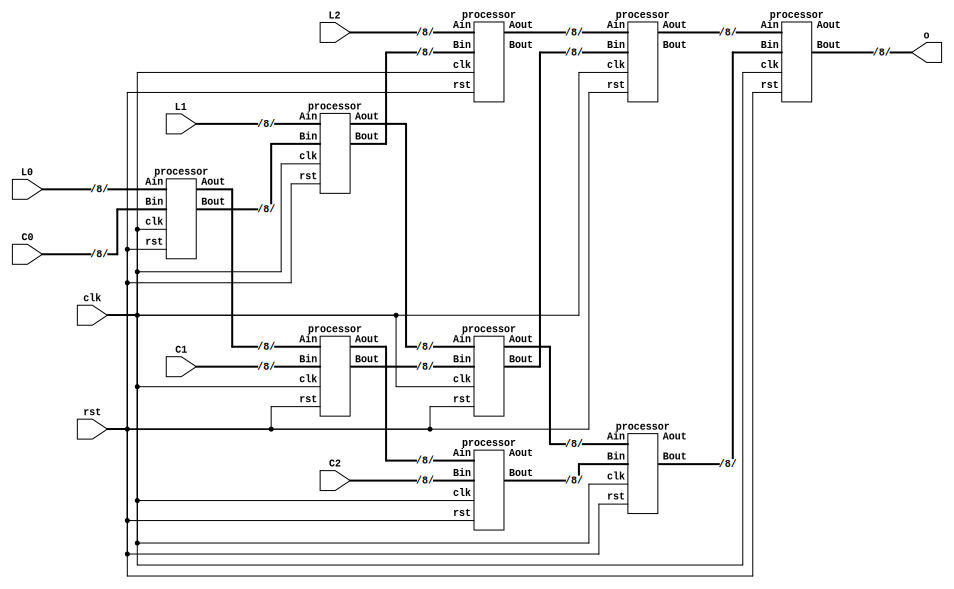

In [ ]:
#@title Desenho da matrix sistólica
%%print_verilog -top circuit
module memory (input [3:0] addr, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= i;
  end
// READ
  assign readdata =  memory[addr];
endmodule


module memoryOut (input [3:0] addr, input [7:0] writedata, input clk, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= i;
  end
// READ
  assign readdata =  memory[addr];
// WRITE
  always @(posedge clk) begin
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) begin
    if ( !rst )
       cnt<=0;
    else
       cnt <= cnt +1;
 	end
endmodule

module register(input clk, rst, input [7:0] in, output reg [7:0] out);
  always @(posedge clk)
  begin
    if ( !rst )
       out<=0;
    else
       out <= in;
 	end
endmodule

//ENTRA CLOCK, RESET, VALOR DA LINHA E DA COLUNA, E PARAMETRO PARA RECEBER A SAIDA
module processor(input clk, rst, input[7:0]Ain,Bin, output[7:0]Aout,Bout);
  reg [7:0] acc,aout,bout;
  always @(posedge clk)
    begin
      if ( !rst ) begin
        acc <=0;
        aout <=0;
        bout <=0;
      end
      else begin
        aout <= Ain;
        bout <= Bin;
        acc <=(Ain * Bin) + acc;
      end

  end
    assign Aout = aout;
    assign Bout = bout;

endmodule

module circuit(input clk, rst,input [7:0]L0,L1,L2,C0,C1,C2, output [7:0] o);
  wire[7:0] P00Aout,P00Bout,P01Aout,P01Bout,P02Aout,P02Bout,
            P10Aout,P10Bout,P11Aout,P11Bout,P12Aout,P12Bout,
            P20Aout,P20Bout,P21Aout,P21Bout,P22Aout,P22Bout;

  //PRIMEIRA LINHA DE MODULOS PEQUENOS QUE FAZEM AS CONTAS
  processor P00(clk,rst,L0,C0,P00Aout,P00Bout);
  processor P01(clk,rst,P00Aout,C1,P01Aout,P01Bout);
  processor P02(clk,rst,P01Aout,C2,P02Aout,P02Bout);

  //SEGUNDA LINHA DE MODULOS PEQUENOS QUE FAZEM AS CONTAS
  processor P10(clk,rst,L1,P00Bout,P10Aout,P10Bout);
  processor P11(clk,rst,P10Aout,P01Bout,P11Aout,P11Bout);
  processor P12(clk,rst,P11Aout,P02Bout,P12Aout,P12Bout);

  //TERCEIRA LINHA DE MODULOS PEQUENOS QUE FAZEM AS CONTAS
  processor P20(clk,rst,L2,P10Bout,P20Aout,P20Bout);
  processor P21(clk,rst,P20Aout,P11Bout,P21Aout,P21Bout);
  processor P22(clk,rst,P21Aout,P12Bout,P22Aout,P22Bout);

  assign o = P22Bout;
endmodule


In [ ]:
#@title Simulação do Sistólico
%%verilog
module memory (input [3:0] addr, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= i;
  end
// READ
  assign readdata =  memory[addr];
endmodule


module memoryOut (input [3:0] addr, input [7:0] writedata, input clk, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= i;
  end
// READ
  assign readdata =  memory[addr];
// WRITE
  always @(posedge clk) begin
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) begin
    if ( !rst )
       cnt<=0;
    else
       cnt <= cnt +1;
 	end
endmodule

module register(input clk, rst, input [7:0] in, output reg [7:0] out);
  always @(posedge clk)
  begin
    if ( !rst )
       out<=0;
    else
       out <= in;
 	end
endmodule

//ENTRA CLOCK, RESET, VALOR DA LINHA E DA COLUNA, E PARAMETRO PARA RECEBER A SAIDA
module processor(input clk, rst, input[7:0]Ain,Bin, output[7:0]Aout,Bout);
  reg [7:0] acc,aout,bout;
  always @(posedge clk)
    begin
      if ( !rst ) begin
        acc <=0;
        aout <=0;
        bout <=0;
      end
      else begin
        aout <= Ain;
        bout <= Bin;
        acc <=(Ain * Bin) + acc;
      end

  end
    assign Aout = aout;
    assign Bout = bout;

endmodule

module circuit(input clk, rst,input [7:0]L0,L1,L2,C0,C1,C2);
  wire[7:0] P00Aout,P00Bout,P01Aout,P01Bout,P02Aout,P02Bout,
            P10Aout,P10Bout,P11Aout,P11Bout,P12Aout,P12Bout,
            P20Aout,P20Bout,P21Aout,P21Bout,P22Aout,P22Bout;

  //PRIMEIRA LINHA DE MODULOS PEQUENOS QUE FAZEM AS CONTAS
  processor P00(clk,rst,L0,C0,P00Aout,P00Bout);
  processor P01(clk,rst,P00Aout,C1,P01Aout,P01Bout);
  processor P02(clk,rst,P01Aout,C2,P02Aout,P02Bout);

  //SEGUNDA LINHA DE MODULOS PEQUENOS QUE FAZEM AS CONTAS
  processor P10(clk,rst,L1,P00Bout,P10Aout,P10Bout);
  processor P11(clk,rst,P10Aout,P01Bout,P11Aout,P11Bout);
  processor P12(clk,rst,P11Aout,P02Bout,P12Aout,P12Bout);

  //TERCEIRA LINHA DE MODULOS PEQUENOS QUE FAZEM AS CONTAS
  processor P20(clk,rst,L2,P10Bout,P20Aout,P20Bout);
  processor P21(clk,rst,P20Aout,P11Bout,P21Aout,P21Bout);
  processor P22(clk,rst,P21Aout,P12Bout,P22Aout,P22Bout);

endmodule

module tb();
reg clk,rst;
reg [7:0] L0,L1,L2,C0,C1,C2,o;
integer k;

circuit T(clk,rst,L0,L1,L2,C0,C1,C2);

initial begin
  clk=0;
     forever #1 clk = ~clk;
end

initial begin
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
L0 = 1;L1 = 0;L2 = 0;
C0 = 4;C1 = 0;C2 = 0;
#2
L0 = 3;L1 = 2;L2 = 0;
C0 = 2;C1 = 8;C2 =0 ;
#2
L0 = 9;L1 = 4;L2 = 8;
C0 = 9;C1 = 4;C2 = 5;
#2
L0 = 0;L1 = 9;L2 = 8;
C0 = 0;C1 = 8;C2 = 4;
#2
L0 = 0;L1 = 0;L2 = 9;
C0 = 0;C1 = 0;C2 = 9 ;
#6
//$writememh("mem.data", tb.T.B.memory, 0, 15);
$dumpoff;
$finish;
end
endmodule

VCD info: dumpfile test.vcd opened for output.



###Saida
O valor da solução é dado pelo ultimo valor do acc, que se mantem ate o final da execução, note que os valores aparecem da esquerda pra direita de cima para baixo, assim a solução no waveforms deve ser:

    87 89 93 97 104 107 129 168 153
```
0 3 9     4 8 5       87  84  93
2 4 9  x  2 4 4   =   97 104 107
8 8 9     9 8 9      129 168 153
```

[Desenho das formas de onda](https://excalidraw.com/#json=pqxoVW7dPtRLjMzm3tAiU,-6xPoQyRsWxeV6yecSUB8Q)

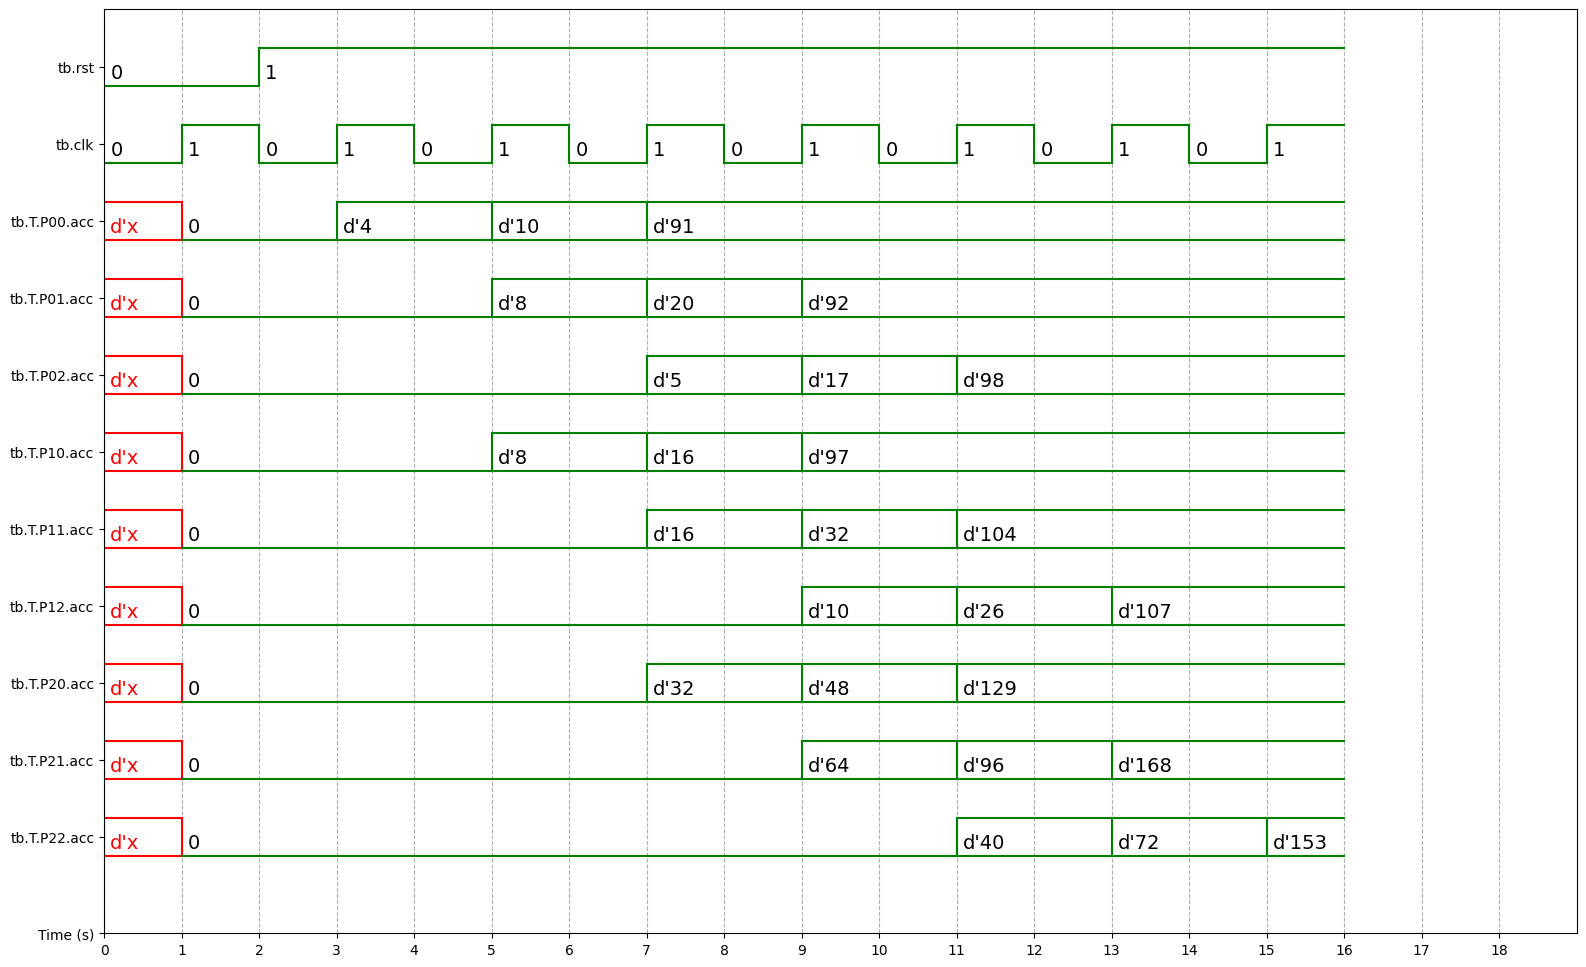

In [ ]:
#@title Formas de Onda da simulação
%%waveform test.vcd

sign_list = ['tb.rst','tb.clk','tb.T.P00.acc','tb.T.P01.acc','tb.T.P02.acc','tb.T.P10.acc','tb.T.P11.acc','tb.T.P12.acc','tb.T.P20.acc','tb.T.P21.acc','tb.T.P22.acc']
time_begin = 0
time_end = 18
base = 'dec' # bin, dec, dec2, hex, octal

## Exemplo $O(n^3)$ operadores

Implementar o multiplicador de [matriz sistólico](https://raw.githubusercontent.com/arduinoufv/inf450_peo/master/apostilas/m2x2.png) para uma matriz 3x3. Fazer três multiplicações de matrizes. AxB, depois (AxB)xA e depois (AxB)xB


```
    1 2 3          9 8 7            30  24 18
A = 4 5 6    X B=  6 5 4 => A*B =   84  69 54
    7 8 9          3 2 1           138 114 90


          252   324   396
(AXB)XA = 738   945   1152
          1224  1566  1908

          468  396  324
(AXB)XB = 1332 1125 918
          2196 1854 1512

```



In [ ]:
#@title Exemplo sem usar "Pipeline" para alimentar os dados
%%verilog
//ENTRA CLOCK, RESET, VALOR DA LINHA E DA COLUNA, E PARAMETRO PARA RECEBER A SAIDA
module circuit(input clk, rst, input[7:0]a00,a01,a02,a10,a11,a12,a20,a21,a22,b00,b01,b02,b10,b11,b12,b20,b21,b22);
  reg [32:0] t [0:26];
  reg [32:0] r [0:26];
  reg [32:0] aux [0:26];
  reg [32:0] c00,c01,c02,c10,c11,c12,c20,c21,c22;
  integer k;
  always @(posedge clk)
    begin
      if ( !rst ) begin
        for(k = 0;k<27;k = k + 1)begin
            t[k] <= 0;
            r[k] <= 0;
            aux[k] <= 0;
        end
        c00 <= 0;c01<= 0;c02<= 0;c10<= 0;c11<= 0;c12<= 0;c20<= 0;c21<= 0;c22<= 0;
      end
      else begin
        //________PRIMEIRA LINHA_____________
        //C00
        t[0] <= a00 * b00;
        t[1] <= a01 * b10;
        t[2] <= a02 * b20;

        r[0] <= t[0] + t[1];
        aux[0] <= t[2];
        c00 <= aux[0] + r[0];
        //C01
        t[3] <= a00 * b01;
        t[4] <= a01 * b11;
        t[5] <= a02 * b21;

        r[1] <= t[3] + t[4];
        aux[1] <= t[5];
        c01 <= aux[1] + r[1];

        //C02
        t[6] <= a00 * b02;
        t[7] <= a01 * b12;
        t[8] <= a02 * b22;

        r[2] <= t[6] + t[7];
        aux[2] <= t[8];
        c02 <= aux[2] + r[2];

        //________SEGUNDA LINHA_____________
        //C10
        t[9] <= a10 * b00;
        t[10] <= a11 * b10;
        t[11] <= a12 * b20;

        r[3] <= t[9] + t[10];
        aux[3] <= t[11];
        c10 <= aux[3] + r[3];
        //C11
        t[12] <= a10 * b01;
        t[13] <= a11 * b11;
        t[14] <= a12 * b21;

        r[4] <= t[12] + t[13];
        aux[4] <= t[14];
        c11 <= aux[4] + r[4];

        //C12
        t[15] <= a10 * b02;
        t[16] <= a11 * b12;
        t[17] <= a12 * b22;

        r[5] <= t[15] + t[16];
        aux[5] <= t[17];
        c12 <= aux[5] + r[5];

        //________TERCEIRA LINHA_____________
        //C20
        t[18] <= a20 * b00;
        t[19] <= a21 * b10;
        t[20] <= a22 * b20;

        r[6] <= t[18] + t[19];
        aux[6] <= t[20];
        c20 <= aux[6] + r[6];
        //C21
        t[21] <= a20 * b01;
        t[22] <= a21 * b11;
        t[23] <= a22 * b21;

        r[7] <= t[21] + t[22];
        aux[7] <= t[23];
        c21 <= aux[7] + r[7];

        //C22
        t[24] <= a20 * b02;
        t[25] <= a21 * b12;
        t[26] <= a22 * b22;

        r[8] <= t[24] + t[25];
        aux[8] <= t[26];
        c22 <= aux[8] + r[8];
      end
  end
endmodule

module tb();
reg clk,rst;
reg [7:0] a00,a01,a02,a10,a11,a12,a20,a21,a22,b00,b01,b02,b10,b11,b12,b20,b21,b22,o;
integer k;

circuit T(clk,rst,a00,a01,a02,a10,a11,a12,a20,a21,a22,b00,b01,b02,b10,b11,b12,b20,b21,b22);

initial begin
  clk=0;
     forever #1 clk = ~clk;
end

initial begin
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
a00 = 1;a01 = 2;a02 = 3;a10 = 4;a11 = 5;a12 = 6;a20 = 7;a21 = 8;a22 = 9;b00 = 9;b01 = 8;b02 = 7;b10 = 6;b11 = 5;b12 = 4;b20 = 3;b21 = 2;b22 =1;
#6
rst = 0;
#2
rst = 1;
a00 = 30;a01 = 24;a02 = 18;a10 = 84;a11 = 69;a12 = 54;a20 = 138;a21 = 114;a22 = 90;b00 = 1;b01 = 2;b02 = 3;b10 = 4;b11 = 5;b12 = 6;b20 = 7;b21 = 8;b22 =9;
#6
rst = 0;
#2
rst = 1;
a00 = 30;a01 = 24;a02 = 18;a10 = 84;a11 = 69;a12 = 54;a20 = 138;a21 = 114;a22 = 90;b00 = 9;b01 = 8;b02 = 7;b10 = 6;b11 = 5;b12 =4;b20 = 3;b21 = 2;b22 =1;
#6
$writememh("mem.data", tb.T.t, 0, 26);
$dumpoff;
$finish;
end
endmodule

VCD info: dumpfile test.vcd opened for output.



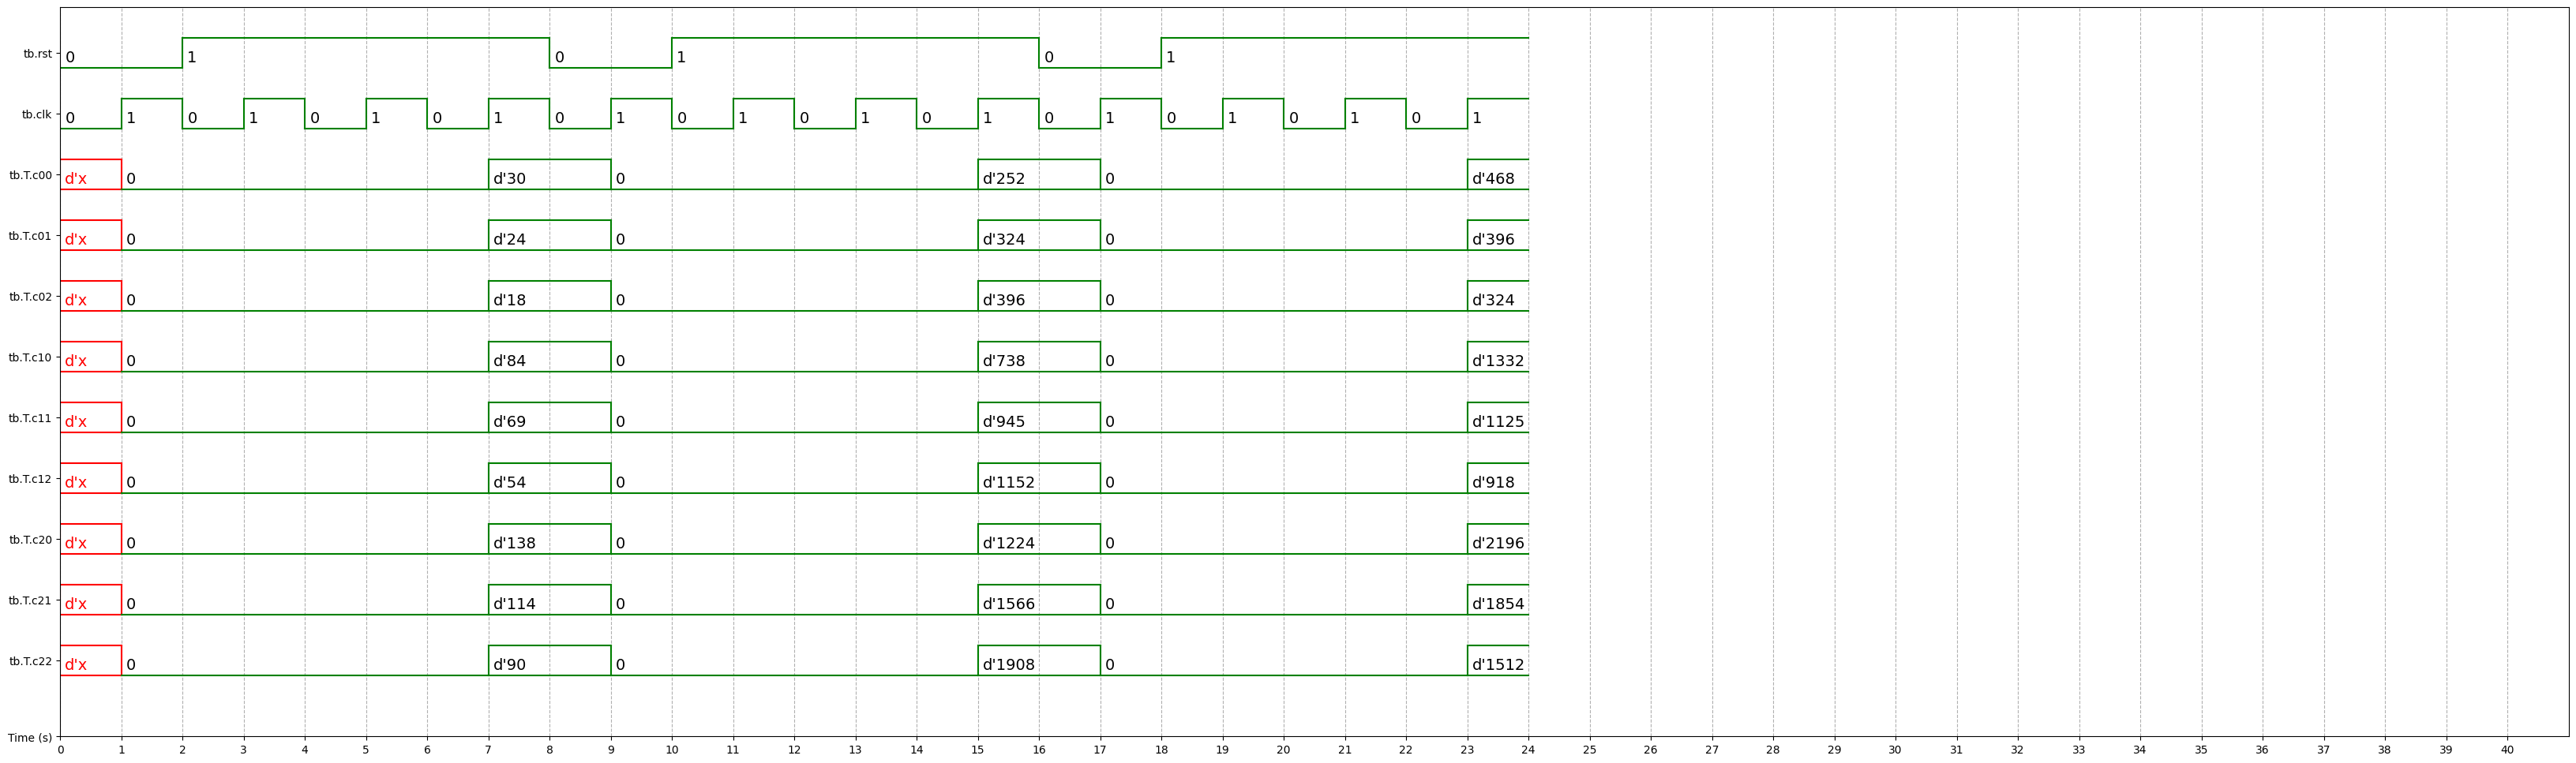

In [ ]:
#@title  Formas de onda
%%waveform test.vcd

sign_list = ['tb.rst','tb.clk','tb.T.c00','tb.T.c01','tb.T.c02','tb.T.c10','tb.T.c11','tb.T.c12','tb.T.c20','tb.T.c21','tb.T.c22',]
time_begin = 0
time_end = 40
base = 'dec' # bin, dec, dec2, hex, octal

# Trabalho 2023 - Parte I

Mostrar que funciona em pipeline (semelhante aos tensor core das GPU) para o exemplo anterior para multiplicação de matrizes.

## Parte II

Fazer um sistólico para o KNN com 2 atributos. Abaixo um exemplo com um atributo apenas para distância.

O que precisa fazer:
* ler dois atributos de duas memorias diferentes (memX e memY)
* ler o Ponto de entrada com dois registradores X e Y, pode ser programado no "reset" no código, ou pode ser entrada que voce seleciona no testbench
* comparar X-"memX" e Y-"memY" usando distância de manhattan
* o KNN irá atuar sobre a distância para irá armazenar os valores dos pontos com as coordenadas "X" e "Y" mais proximas.

[desenho esboço](https://excalidraw.com/#json=o2lP3Sbu-UOM_cE8mSwur,rezPC6U20X3pct_z1WaIAA)

Abaixo o projeto apenas da parte do calculo da distância para ter como base.

/content/cad4u/verilog/yosys_command.sh circuit code.v


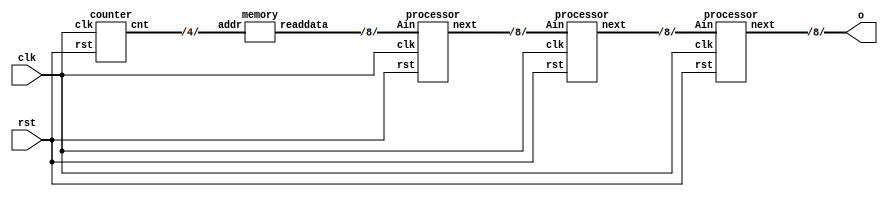

In [ ]:
#@title Estrutura do Sistólico para distância
%%print_verilog -top circuit
module memory (input [3:0] addr, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= 15-i;
  end
// READ
  assign readdata =  memory[addr];
endmodule


module memoryOut (input [3:0] addr, input [7:0] writedata, input clk, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= i;
  end
// READ
  assign readdata =  memory[addr];
// WRITE
  always @(posedge clk) begin
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) begin
    if ( !rst )
       cnt<=0;
    else
       cnt <= cnt +1;
 	end
endmodule

module register(input clk, rst, input [7:0] in, output reg [7:0] out);
  always @(posedge clk)
  begin
    if ( !rst )
       out<=0;
    else
       out <= in;
 	end
endmodule

module processor(input clk, rst, input[7:0]Ain, output reg [7:0] next);
  reg [7:0] D;
  always @(posedge clk)
    begin
      if ( rst == 1'b0 ) begin
        D <= 255;
        next <= 255;
      end
      else
        if ( D > Ain)
        begin
           D <= Ain;
           next <= D;
        end
        else
           next <= Ain;
    end

endmodule


module circuit(input clk, rst, output [7:0] o);
  wire[7:0] In, k0, k1;
  wire[3:0] cnt;

  memory M(cnt,In);
  counter C(clk,rst,cnt);
  processor K0(clk,rst,In,k0);
  processor K1(clk,rst,k0,k1);
  processor K2(clk,rst,k1,o);


endmodule


In [ ]:
#@title Simulação
%%verilog
module memory (input [3:0] addr, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    memory[0] = 5;
    memory[1] = 7;
    memory[2] = 6;
    memory[3] = 3;
    memory[4] = 9;
    memory[5] = 2;
    memory[6] = 10;
    memory[7] = 1;
    memory[8] = 5;
    memory[9] = 2;
    memory[10] = 5;
    memory[11] = 5;
  end
// READ
  assign readdata =  memory[addr];
endmodule


module memoryOut (input [3:0] addr, input [7:0] writedata, input clk, output [7:0] readdata);

  integer i;
  reg [7:0] memory [0:15]; // *** MEMORY ***

  // fill the memory
  initial begin
    for (i = 0; i <= 15; i++)
      memory[i] <= i;
  end
// READ
  assign readdata =  memory[addr];
// WRITE
  always @(posedge clk) begin
      memory[addr] <= writedata;
	end
endmodule

module counter(input clk, rst, output reg [3:0] cnt);
  always @(posedge clk) begin
    if ( !rst )
       cnt<=0;
    else
       cnt <= cnt +1;
 	end
endmodule

module register(input clk, rst, input [7:0] in, output reg [7:0] out);
  always @(posedge clk)
  begin
    if ( !rst )
       out<=0;
    else
       out <= in;
 	end
endmodule

module processor(input clk, rst, input[7:0]Ain, output reg [7:0] next);
  reg [7:0] D;
  always @(posedge clk)
    begin
      if ( rst == 1'b0 ) begin
        D <= 255;
        next <= 255;
      end
      else
        if ( D > Ain)
        begin
           D <= Ain;
           next <= D;
        end
        else
           next <= Ain;
    end

endmodule

module circuit(input clk, rst, output [7:0] o);
  wire[7:0] In, k0, k1;
  wire[3:0] cnt;

  memory M(cnt,In);
  counter C(clk,rst,cnt);
  processor K0(clk,rst,In,k0);
  processor K1(clk,rst,k0,k1);
  processor K2(clk,rst,k1,o);


endmodule

module tb();
reg clk,rst;
wire [7:0] o;

circuit T(clk,rst,o);

initial begin
  clk=0;
     forever #1 clk = ~clk;
end

initial begin
$dumpfile("test.vcd");
$dumpvars;
rst = 0;
#2
rst = 1;
#30
$dumpoff;
$finish;
end
endmodule


VCD info: dumpfile test.vcd opened for output.



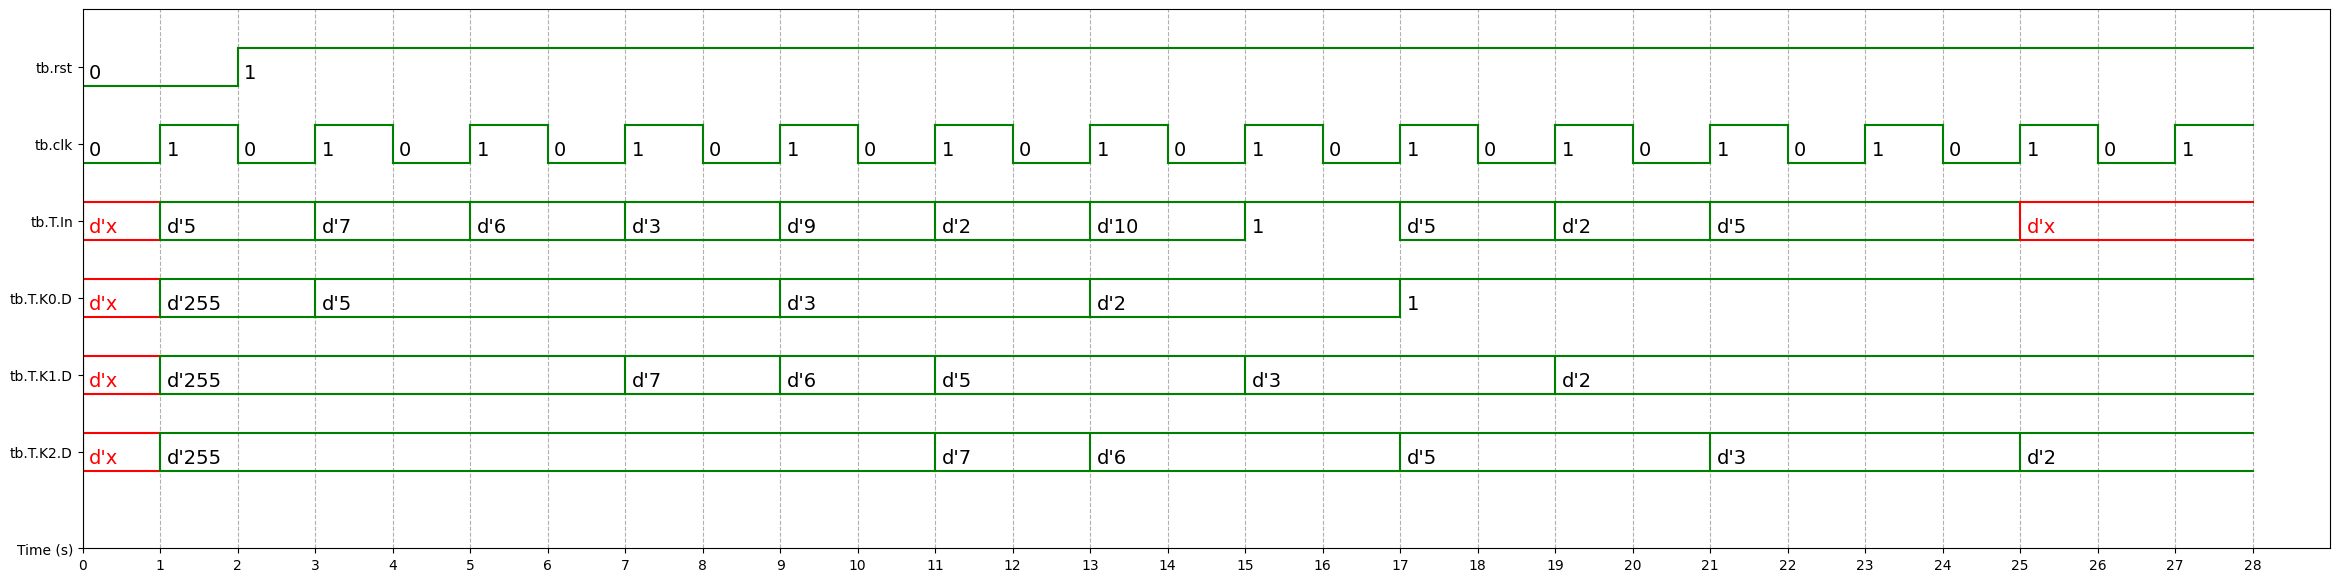

In [ ]:
#@title  Formas de onda
%%waveform test.vcd

sign_list = ['tb.rst','tb.clk','tb.T.In','tb.T.K0.D','tb.T.K1.D','tb.T.K2.D']
time_begin = 0
time_end = 28
base = 'dec' # bin, dec, dec2, hex, octal

# Questao 2 Prova 3 Sistólicos

* Quantas operações (add e mult) terá o multiplicador sistólico pipeline com O($n^3$) para uma matriz 4x4 ? 5x5 ?

* Se for D = A * B + C, onde todos são matrizes NxN, para N=3, quantas operações terá ? Quantas leituras de memória ? Qual a intensidade aritmética ?

* Para o Knn, se for fazer em paralelo, com 4 linhas de execução. Para um vetor com 100 elementos, quantos ciclos para gerar os resultados ? Suponha que X ciclos são necessários para o primeiro elemento chegar ao módulo "FIFO" KNN sistólico. Além de X ciclos, quantos serão necessários em função de $k$ ? Desenhe o esboço da sua arquitetura. Pode ser tudo em paralelo ou precisa de uma redução (justifique).

